<a href="https://colab.research.google.com/github/vivianlu63/MotorImagery-Analysis/blob/main/Motor_Imagery_Michael.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import os, requests
from matplotlib import rcParams
from matplotlib import pyplot as plt
from scipy import signal
import numpy as np 
from nilearn import plotting  
from nimare import utils

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [30]:
pip install nilearn nimare duecredit

In [31]:
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [32]:
fname = 'motor_imagery.npz'
url = "https://osf.io/ksqv8/download"

if not os.path.isfile(fname):
    try:
        r =requests.get(url)
    except requests.ConnectionError:
        print("Failed to download data")
    else:
        if r.status_code != requests.codes.ok:
            print("Failed to download data")
        else:
            with open(fname, "wb") as fid:
                fid.write(r.content)

In [33]:
alldat = np.load(fname, allow_pickle=True)['dat']

In [34]:
real = alldat[0][0]
imagine = alldat[0][1]

In [35]:
class process():
    def __init__():
        return print("Working")

    def preprocess(data):
        V = data['V'].astype('float32')
        b, a = signal.butter(3, [50], btype = 'high', fs=1000)
        V = signal.filtfilt(b,a,V,0)
        V = np.abs(V)**2
        b, a = signal.butter(3, [10], btype = 'low', fs=1000)
        V = signal.filtfilt(b,a,V,0)
        V = V/V.mean(0)
        return V

In [36]:
processed_real = process.preprocess(real)
nt_pr, nchan_pr = processed_real.shape
nstim_r = len(real['t_on'])

trange = np.arange(0, 2000)
ts = real['t_on'][:,np.newaxis] + trange

V_epochs_pr = np.reshape(processed_real[ts, :], (nstim_r, 2000, nchan_pr))

V_hand_real = (V_epochs_pr[real['stim_id']==12])



##### This is the voltage data and you could change the trial from here
hand_real_data = V_hand_real.mean(0)

In [37]:
processed_imagine = process.preprocess(imagine)
nt_pi, nchan_pi = processed_imagine.shape
nstim_i = len(imagine['t_on'])

trange = np.arange(0, 2000)
ts = imagine['t_on'][:,np.newaxis] + trange

V_epochs_pi = np.reshape(processed_imagine[ts, :], (nstim_i, 2000, nchan_pi))

V_hand_imagine = (V_epochs_pi[imagine['stim_id']==12])



##### This is the voltage data and you could change the trial from here
hand_imagine_data = V_hand_imagine.mean(0)

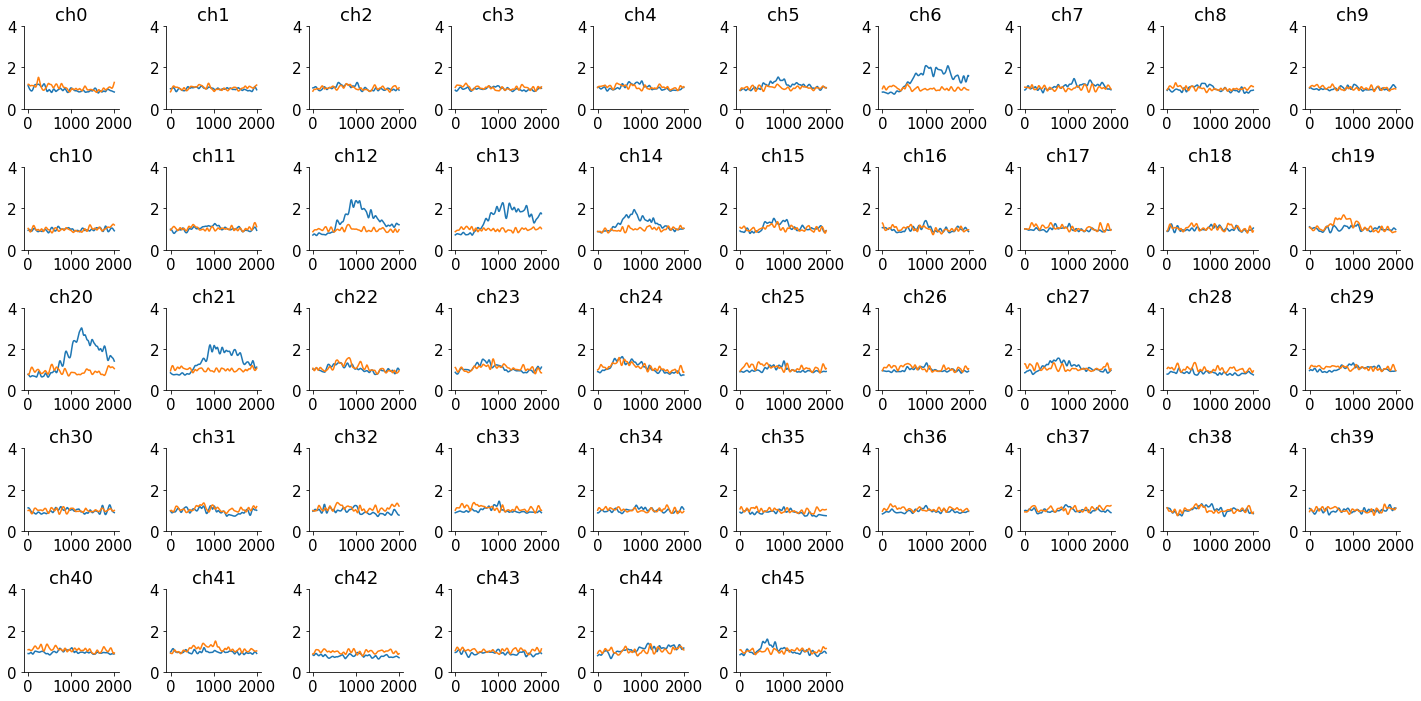

In [38]:
plt.figure(figsize=(20,10))


for j in range(46):

    ax = plt.subplot(5,10,j+1)
    plt.plot(trange, hand_real_data[:,j])
    plt.plot(trange, hand_imagine_data[:,j])
    plt.title('ch%d'%j)
    plt.xticks([0, 1000, 2000])
    plt.ylim([0, 4])

In [39]:
class plots():
    def __init__():
        return

    def singlechannel1(data, channel):
        plt.figure(figsize=(20,10))
        plt.plot(trange, data[:,channel])
        plt.title('ch%d'%channel)
        plt.xticks([0, 1000, 2000])
        plt.ylim([0, 4])

    def singlechannel2(data, data2, channel):
        plt.figure(figsize=(20,10))
        plt.plot(trange, data[:,channel])
        plt.plot(trange, data2[:,channel])
        plt.title('ch%d'%channel)
        plt.xticks([0, 1000, 2000])
        plt.ylim([0, 4])

    def all_channels1(data):
        plt.figure(figsize=(20,10))
        for j in range(46):
            ax = plt.subplot(5,10,j+1)
            plt.plot(trange, data[:,j])
            plt.title('ch%d'%j)
            plt.xticks([0, 1000, 2000])
            plt.ylim([0, 4])

    def all_channels2(data, data2):
        plt.figure(figsize=(20,10))
        for j in range(46):
            ax = plt.subplot(5,10,j+1)
            plt.plot(trange, data[:,j])
            plt.plot(trange, data2[:,j])
            plt.title('ch%d'%j)
            plt.xticks([0, 1000, 2000])
            plt.ylim([0, 4])

In [76]:
#@title Michael's Code
# Matrix Form: Y = X @ theta(weights)

# X = all HAND trials real and imaginary

In [77]:
X=[]
for j in range(46):
  X.append(hand_real_data[:,j])
  X.append(hand_imagine_data[:,j])
X=np.array(X)

#real=0 imaginary=1
y=[]
for j in range(46):
  y.append(0)
  y.append(1)
y=np.array(y)

In [78]:
# X = x_matrix = (n_samples=46*2, features=2000)
#y = data["real=0 or imaginary=1"]
#X = data["X"]

# Define the model
log_reg = LogisticRegression(penalty="none")
accuracies = cross_val_score(LogisticRegression(penalty='none'), X, y, cv=8) # k=8 crossvalidation
print(accuracies)
accuracies.mean()
print(accuracies.mean())

# Fit it to data
log_reg.fit(X[0:60], y[0:60])

y_pred = log_reg.predict(X[60:92])
print(y_pred)

[1.         0.91666667 0.83333333 0.66666667 0.90909091 0.90909091
 1.         0.72727273]
0.8702651515151515
[0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1]


In [79]:
def compute_accuracy(X, y, model):
  y_pred = model.predict(X)
  accuracy = (y == y_pred).mean()
  return accuracy

# Compute training accuracy
train_accuracy = compute_accuracy(X, y, log_reg)
print(f"Accuracy on the training data: {train_accuracy:.2%}")

Accuracy on the training data: 95.65%


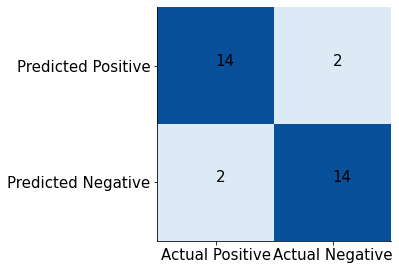

In [80]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
y_true = y[60:92]
y_pred = y_pred
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

#confusion = [[0.75,0.34],[0.12,0.98]]
fig, ax = plt.subplots(1,1)
ax.imshow(confusion,cmap='Blues',clim=[0,16])
plt.text(0,0,str(tn))
plt.text(0,1,str(fp))
plt.text(1,0,str(fn))
plt.text(1,1,str(tp))
x_label_list = ['Actual Positive','Actual Negative']
ax.set_xticks([0,1])
ax.set_xticklabels(x_label_list)
y_label_list = ['Predicted Positive','Predicted Negative']
ax.set_yticks([0,1])
ax.set_yticklabels(y_label_list)
plt.show()

#bottom left is False Negative
#top right is False Positive

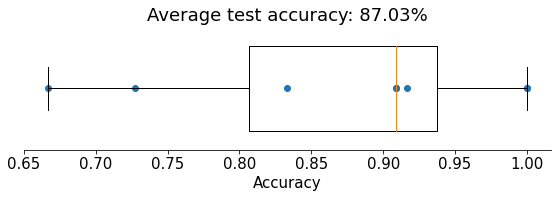

In [81]:
#Boxplot
#@markdown Run to plot out these `k=8` accuracy scores.
f, ax = plt.subplots(figsize=(8, 3))
ax.boxplot(accuracies, vert=False, widths=.7)
ax.scatter(accuracies, np.ones(8))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {accuracies.mean():.2%}"
)
ax.spines["left"].set_visible(False)

In [82]:
#@title 
def plot_weights(models, sharey=True):
  """Draw a stem plot of weights for each model in models dict."""
  n = len(models)
  f = plt.figure(figsize=(10, 2.5 * n))
  axs = f.subplots(n, sharex=True, sharey=sharey)
  axs = np.atleast_1d(axs)

  for ax, (title, model) in zip(axs, models.items()):

    ax.margins(x=.02)
    stem = ax.stem(model.coef_.squeeze(), use_line_collection=True)
    stem[0].set_marker(".")
    stem[0].set_color(".2")
    stem[1].set_linewidths(.5)
    stem[1].set_color(".2")
    stem[2].set_visible(False)
    ax.axhline(0, color="C3", lw=3)
    ax.set(ylabel="Weight", title=title)
  ax.set(xlabel="Time (a.k.a. feature)")
  f.tight_layout()

def plot_function(f, name, var, points=(-10, 10)):
    """Evaluate f() on linear space between points and plot.

    Args:
      f (callable): function that maps scalar -> scalar
      name (string): Function name for axis labels
      var (string): Variable name for axis labels.
      points (tuple): Args for np.linspace to create eval grid.
    """
    x = np.linspace(*points)
    ax = plt.figure().subplots()
    ax.plot(x, f(x))
    ax.set(
      xlabel=f'${var}$',
      ylabel=f'${name}({var})$'
    )


def plot_model_selection(C_values, accuracies):
  """Plot the accuracy curve over log-spaced C values."""
  ax = plt.figure().subplots()
  ax.set_xscale("log")
  ax.plot(C_values, accuracies, marker="o")
  best_C = C_values[np.argmax(accuracies)]
  ax.set(
      xticks=C_values,
      xlabel="$C$",
      ylabel="Cross-validated accuracy",
      title=f"Best C: {best_C:1g} ({np.max(accuracies):.2%})",
  )

def plot_non_zero_coefs(C_values, non_zero_l1, n_voxels):
  """Plot the accuracy curve over log-spaced C values."""
  ax = plt.figure().subplots()
  ax.set_xscale("log")
  ax.plot(C_values, non_zero_l1, marker="o")
  ax.set(
    xticks=C_values,
    xlabel="$C$",
    ylabel="Number of non-zero coefficients",
  )
  ax.axhline(n_voxels, color=".1", linestyle=":")
  ax.annotate("Total\n# Time steps", (C_values[0], n_voxels * .98), va="top")

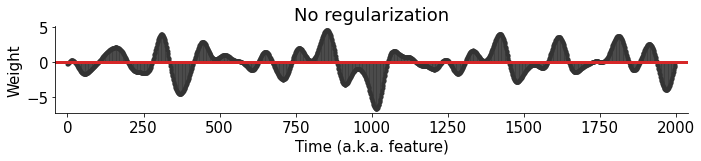

In [49]:
log_reg = LogisticRegression(penalty="none").fit(X, y)
plot_weights({"No regularization": log_reg})

Accuracy on the training data: 95.65%
